In [1]:
#Installing wordcloud
!pip install wordcloud

In [2]:
#Installing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#Loading in the data
j_data = pd.read_csv('tourist_accommodation_reviews.csv')

In [4]:
#viewing the head and tail of the data
j_data

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [5]:
#Checking the information of the dataset
j_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [6]:
#Describing the dataset
j_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [7]:
#Checkinh the shape of the dataset
j_data.shape

(53644, 5)

In [8]:
#Checking the number of hotels/restaurants in each location 
j_data.groupby('Location')['Hotel/Restaurant name'].nunique().sort_values(ascending=False)

Location
 Patong              164
 Karon                59
 Kata Beach           59
 Rawai                39
 Choeng Thale         34
 Phuket Town          34
 Kamala               32
 Mai Khao             24
 Cape Panwa           15
 Chalong              13
 Thalang District     12
 Kathu                11
 Nai Yang             10
 Nai Harn              9
 Bang Tao Beach        6
 Karon Beach           4
 Wichit                4
 Koh Kaew              3
 Talat Yai             3
 Kata Noi Beach        2
 Pa Khlok              1
 Nai Thon              1
 Ratsada               1
 Sakhu                 1
 Talat Nuea            1
Name: Hotel/Restaurant name, dtype: int64

In [9]:
#Choosing the hotels/restaurants in Kamala
j_hotelReviews = j_data[j_data['Location'] == ' Kamala']

In [10]:
#Viewing the resulting df
j_hotelReviews

,ID,Review Date,Location,Hotel/Restaurant name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."
...,...,...,...,...,...
52475,rn337159219,"Reviewed January 4, 2016",Kamala,Karon Seafood,This is a busy restaurant but the service is v...
52476,rn335662582,"Reviewed December 29, 2015",Kamala,Karon Seafood,It was our first night in Karon and we didn't ...
52477,rn334004242,"Reviewed December 20, 2015",Kamala,Karon Seafood,We unfortunately didn't read trip-advisor befo...
52478,rn329307909,"Reviewed November 26, 2015",Kamala,Karon Seafood,"Ordered springrolls, phad tai and red curry.\r..."


In [11]:
#Checking the number of Hotels in Kamala
j_hotelReviews['Hotel/Restaurant name'].nunique()

32

In [12]:
#Checking the number of reviews to know which hotels to pick
j_hotelReviews.groupby('Hotel/Restaurant name')['Review'].nunique().sort_values(ascending=True)

Hotel/Restaurant name
Heaven                                                            45
Salt & Pepper Restaurant Steakhouse Pizzeria                      63
Oiy Restaurant                                                    67
Bush Garden Kamala<U+200B>                                        69
Pond Restaurant                                                   74
Bellini                                                           75
Bianconero da Tuveri Restaurant & Pizzeria                        77
Danny's Place Kamala                                              77
Hey Ha Bar & Restaurant                                           85
Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand     99
HQ Beach Lounge                                                   99
SILK Restaurant & Bar                                            100
Smile Bar                                                        100
Sweet Dream Restaurant                                           100
Baan Mai    

In [13]:
#Taking the 30 Hotels/Restaurants with the highest reviews
aj_hotelReviews = j_hotelReviews.loc[(j_hotelReviews['Hotel/Restaurant name'] != 'Heaven') 
                                     & (j_hotelReviews['Hotel/Restaurant name']!='Salt & Pepper Restaurant Steakhouse Pizzeria')]

In [14]:
#Checking the new df
aj_hotelReviews

,ID,Review Date,Location,Hotel/Restaurant name,Review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but..."
...,...,...,...,...,...
52475,rn337159219,"Reviewed January 4, 2016",Kamala,Karon Seafood,This is a busy restaurant but the service is v...
52476,rn335662582,"Reviewed December 29, 2015",Kamala,Karon Seafood,It was our first night in Karon and we didn't ...
52477,rn334004242,"Reviewed December 20, 2015",Kamala,Karon Seafood,We unfortunately didn't read trip-advisor befo...
52478,rn329307909,"Reviewed November 26, 2015",Kamala,Karon Seafood,"Ordered springrolls, phad tai and red curry.\r..."


In [15]:
#Confirming the number of hotels in the new df is 30
aj_hotelReviews['Hotel/Restaurant name'].nunique()

30

In [16]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [18]:
#Extracting values from the dictionary and creating new colums within the df

aj_hotelReviews['compound'] = [sentiment.polarity_scores(data)['compound'] for data in aj_hotelReviews['Review']]
aj_hotelReviews['neg'] = [sentiment.polarity_scores(data)['neg'] for data in aj_hotelReviews['Review']]
aj_hotelReviews['neu'] = [sentiment.polarity_scores(data)['neu'] for data in aj_hotelReviews['Review']]
aj_hotelReviews['pos'] = [sentiment.polarity_scores(data)['pos'] for data in aj_hotelReviews['Review']]

C:\Users\user\AppData\Local\Temp\ipykernel_8044\216288957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_hotelReviews['compound'] = [sentiment.polarity_scores(data)['compound'] for data in aj_hotelReviews['Review']]
C:\Users\user\AppData\Local\Temp\ipykernel_8044\216288957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_hotelReviews['neg'] = [sentiment.polarity_scores(data)['neg'] for data in aj_hotelReviews['Review']]
C:\Users\user\AppData\Local\Temp\ipykernel_8044\216288957.py:5: SettingWit

In [19]:
aj_hotelReviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,0.9600,0.000,0.686,0.314
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,0.9704,0.000,0.565,0.435
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,0.9042,0.000,0.742,0.258
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,0.1833,0.147,0.662,0.191
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...",0.3031,0.000,0.870,0.130


In [20]:
aj_hotelReviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.665246,0.027344,0.734711,0.237950
std,0.425807,0.051367,0.123669,0.133204
min,-0.959000,0.000000,0.244000,0.000000
25%,0.619025,0.000000,0.657000,0.140000
50%,0.847500,0.000000,0.738000,0.232000
75%,0.929525,0.043000,0.822000,0.326000
max,0.990400,0.427000,1.000000,0.756000


<AxesSubplot:xlabel='compound', ylabel='Count'>

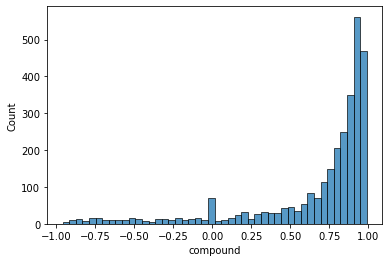

In [21]:
#visualising compound scores
sns.histplot(aj_hotelReviews['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

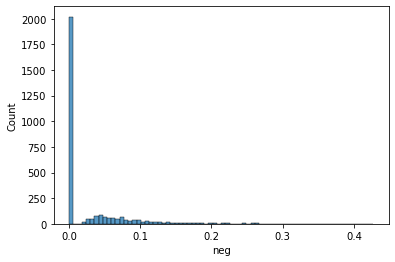

In [22]:
#visualising negative scores
sns.histplot(aj_hotelReviews['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

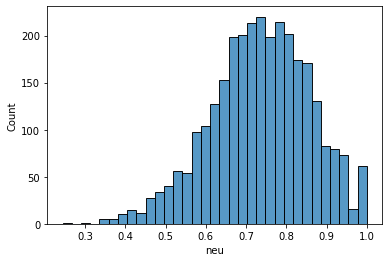

In [23]:
#visualizing neutral scores
sns.histplot(aj_hotelReviews['neu'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

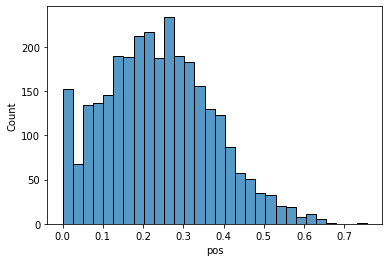

In [24]:
#visualizing positive scores
sns.histplot(aj_hotelReviews['pos'])

In [25]:
#Checking how many negative reviews there are per Hotel/Restaurant
(aj_hotelReviews['compound']<=0).groupby(aj_hotelReviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Mai                                                          7
Baan Rim Pa Kalim                                                 4
Bellini                                                          14
Bianconero da Tuveri Restaurant & Pizzeria                        6
Blue Manao                                                       10
Bush Garden Kamala<U+200B>                                        5
Cafe del Mar Phuket                                              20
Danny's Place Kamala                                             12
Grill Bill                                                        5
H.C. Andersen - Family Restaurant                                16
HQ Beach Lounge                                                  12
Hey Ha Bar & Restaurant                                           6
Kaab Gluay                                                       15
Karon Seafood                                                    27
Mamma Mia Grill & Restaura

In [26]:
#Calculate the percentage of total reviews
percent_negative = pd.DataFrame((aj_hotelReviews['compound']<=0).groupby(aj_hotelReviews['Hotel/Restaurant name']).sum()/aj_hotelReviews['Hotel/Restaurant name'].groupby(aj_hotelReviews['Hotel/Restaurant name']).count()*100,columns=['% negative reviews']).sort_values(by='% negative reviews', ascending = False)

In [27]:
percent_negative

,% negative reviews
Hotel/Restaurant name,
Karon Seafood,27.000000
Cafe del Mar Phuket,20.000000
Napoli Ristorante Pizzeria,19.000000
Wine Connection Deli & Bistro - Central Phuket,18.000000
Ohlala,16.000000
H.C. Andersen - Family Restaurant,16.000000
Kaab Gluay,15.000000
Bellini,14.736842
White Orchid,13.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

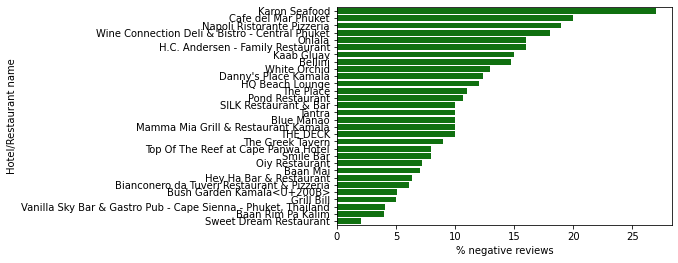

In [28]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='green')

<Figure size 64800x43200 with 0 Axes>

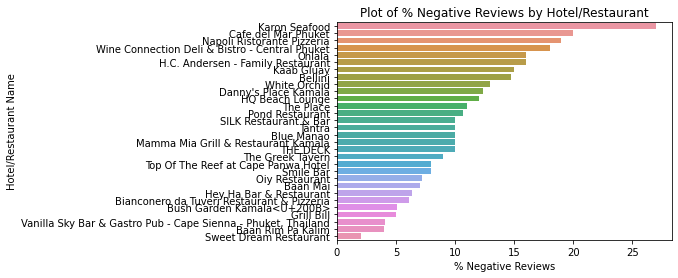

<Figure size 64800x43200 with 0 Axes>

In [29]:
ax = sns.barplot(x='% negative reviews', y=percent_negative.index, data=percent_negative)
plt.xlabel("% Negative Reviews")
plt.ylabel("Hotel/Restaurant Name")
plt.title("Plot of % Negative Reviews by Hotel/Restaurant")
plt.figure(figsize=(900,600))

In [30]:
#Checking how many positive reviews per Hotel/Restaurant
(aj_hotelReviews['compound']>0).groupby(aj_hotelReviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Baan Mai                                                         93
Baan Rim Pa Kalim                                                96
Bellini                                                          81
Bianconero da Tuveri Restaurant & Pizzeria                       92
Blue Manao                                                       90
Bush Garden Kamala<U+200B>                                       94
Cafe del Mar Phuket                                              80
Danny's Place Kamala                                             85
Grill Bill                                                       95
H.C. Andersen - Family Restaurant                                84
HQ Beach Lounge                                                  88
Hey Ha Bar & Restaurant                                          89
Kaab Gluay                                                       85
Karon Seafood                                                    73
Mamma Mia Grill & Restaura

In [31]:
#Calculate the percentage of total reviews
percent_positive = pd.DataFrame((aj_hotelReviews['compound']>0).groupby(aj_hotelReviews['Hotel/Restaurant name']).sum()/aj_hotelReviews['Hotel/Restaurant name'].groupby(aj_hotelReviews['Hotel/Restaurant name']).count()*100,columns=['% positive reviews']).sort_values(by='% positive reviews', ascending = False)

In [32]:
percent_positive

,% positive reviews
Hotel/Restaurant name,
Sweet Dream Restaurant,98.000000
Baan Rim Pa Kalim,96.000000
"Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand",95.959596
Grill Bill,95.000000
Bush Garden Kamala<U+200B>,94.949495
Bianconero da Tuveri Restaurant & Pizzeria,93.877551
Hey Ha Bar & Restaurant,93.684211
Baan Mai,93.000000
Oiy Restaurant,92.783505


<Figure size 64800x43200 with 0 Axes>

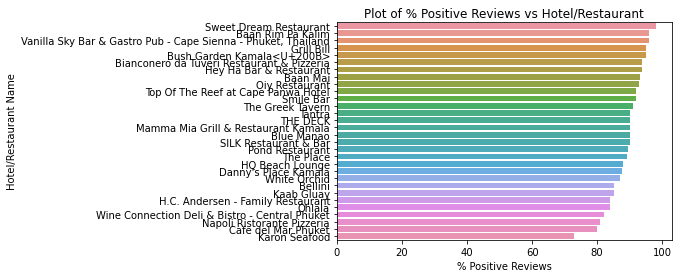

<Figure size 64800x43200 with 0 Axes>

In [33]:
ax = sns.barplot(x='% positive reviews', y=percent_positive.index, data=percent_positive)
plt.xlabel("% Positive Reviews")
plt.ylabel("Hotel/Restaurant Name")
plt.title("Plot of % Positive Reviews vs Hotel/Restaurant")
plt.figure(figsize=(900,600))

In [34]:
#Creating a function to apply for all the data preprocessing steps

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove stop words
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [35]:
#Process the text data ready for wordcloud visualization using the earlier defiined function

aj_hotelReviews['processed_review'] = aj_hotelReviews['Review'].apply(preprocess_text)

positive_aj_hotelReviews = aj_hotelReviews.loc[aj_hotelReviews['compound']>0,:]
negative_aj_hotelReviews = aj_hotelReviews.loc[aj_hotelReviews['compound']<=0,:]

C:\Users\user\AppData\Local\Temp\ipykernel_8044\480331407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj_hotelReviews['processed_review'] = aj_hotelReviews['Review'].apply(preprocess_text)


In [36]:
#Viewing head of the positive reviews df
positive_aj_hotelReviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
6138,rn580448653,Reviewed 5 days ago,Kamala,Grill Bill,The best place to eat when you want time out f...,0.9600,0.000,0.686,0.314,"[best, place, eat, want, time, thai, food, tun..."
6139,rn580335133,Reviewed 5 days ago,Kamala,Grill Bill,Grill Bill is a amazing cozy place with a warm...,0.9704,0.000,0.565,0.435,"[grill, bill, amaz, cozi, place, warm, atmosph..."
6140,rn579799722,Reviewed 1 week ago,Kamala,Grill Bill,After seeing that Grill Bill was the number on...,0.9042,0.000,0.742,0.258,"[see, grill, bill, number, one, restur, kamala..."
6141,rn578695769,Reviewed 1 week ago,Kamala,Grill Bill,3 persons ordered Angus Beef steak 800 baht ea...,0.1833,0.147,0.662,0.191,"[3, person, order, angu, beef, steak, 800, bah..."
6142,rn577118778,Reviewed 2 weeks ago,Kamala,Grill Bill,"Very fast and friendly service, tasty BBQ, but...",0.3031,0.000,0.870,0.130,"[fast, friendli, servic, tasti, bbq, western, ..."


In [37]:
#Viewing head of the negative reviews df
negative_aj_hotelReviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
6151,rn570626095,"Reviewed April 2, 2018",Kamala,Grill Bill,All these good reviews are because of the big ...,-0.1926,0.098,0.820,0.082,"[good, review, big, portion, although, qualiti..."
6177,rn557648617,"Reviewed January 31, 2018",Kamala,Grill Bill,My girlfriend and I were both quite disappoint...,-0.5256,0.080,0.920,0.000,"[girlfriend, quit, disappoint, meal, order, ha..."
6198,rn548363780,"Reviewed December 21, 2017",Kamala,Grill Bill,"Just ate here, and I had a half ribs my partne...",-0.1787,0.065,0.886,0.049,"[ate, half, rib, partner, pork, steak, rib, go..."
6219,rn537596479,"Reviewed November 1, 2017",Kamala,Grill Bill,"Cold and dry food, very expensive. When compla...",-0.5209,0.196,0.804,0.000,"[cold, dri, food, expens, complain, told, pay,..."
6232,rn523096151,"Reviewed September 10, 2017",Kamala,Grill Bill,We had dinner here and the burger just stood o...,-0.0258,0.049,0.905,0.046,"[dinner, burger, stood, that', everyth, alread..."


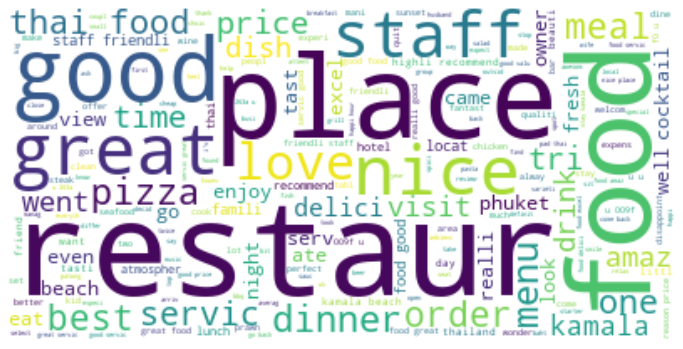

In [38]:
#Wordcloud of words from positive reviews by product

ajReviews_positive_tokens = [word for review in positive_aj_hotelReviews['processed_review'] for word in review]

wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(ajReviews_positive_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
#Use the nltk FreqDist to tabulate the frequent words

from nltk.probability import FreqDist

frequent_positive_words = FreqDist(ajReviews_positive_tokens)
frequent_positive_words.tabulate(14)

    food     good    great  restaur    place   servic    staff     thai     nice        u friendli    price    beach     time 
    1795     1150      875      853      755      748      678      562      553      542      508      435      435      417 


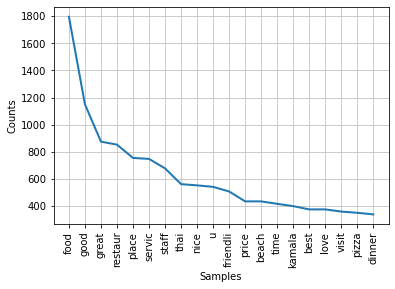

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
#Plotting the values
frequent_positive_words.plot(20)

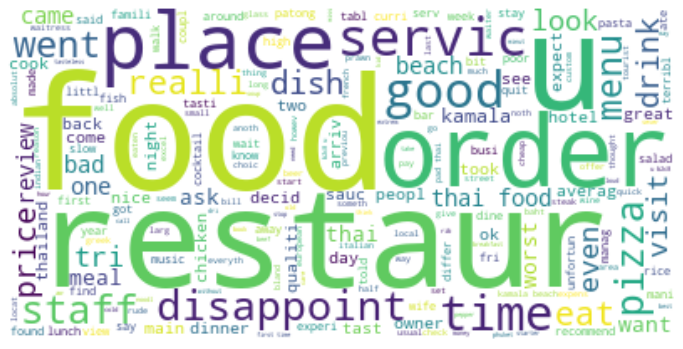

In [41]:
#Wordcloud of words from negative reviews by product
ajReviews_negative_tokens = [word for review in negative_aj_hotelReviews['processed_review'] for word in review]
wordcloud = WordCloud(background_color = 'white').generate_from_text(' '.join(ajReviews_negative_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
#Tabulating the most frequent negative words
frequent_negative_words = FreqDist(ajReviews_negative_tokens)
frequent_negative_words.tabulate(11)

      food          u    restaur      order      place     servic       time       good       thai      staff disappoint 
       193        151        126         84         83         69         67         62         62         55         50 


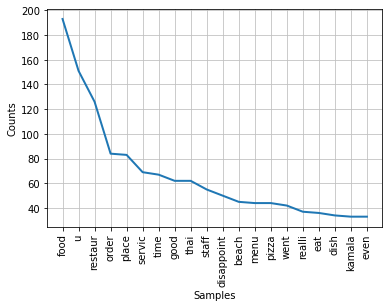

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
#Plotting the values
frequent_negative_words.plot(20)